In [1]:
pwd

'/Users/j.v.thomasabraham/Downloads'

# Loading Image Dataset

In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e2409f82760b464fa7ad4a117397216a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fV0FX0y6zKiv2t1iLytHZFVE_dudockIoHWrjWxuXdq2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_e2409f82760b464fa7ad4a117397216a.get_object(Bucket='day4cnn-donotdelete-pr-qbv4dpbpjsbdz3', Key='Dataset-Plant-Disease.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [14]:
from io import BytesIO
import zipfile 
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r') 
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [16]:
ls

Dataset-Plant-Disease/  __MACOSX/


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_gendata = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_gendata = ImageDataGenerator(rescale = 1./255)

In [3]:
x_train = train_gendata.flow_from_directory("/Users/j.v.thomasabraham/Documents/Project Build-A-Thon SmartInternz/Dataset-Plant-Disease/veg-dataset/train",   
                                            target_size = (128, 128), batch_size = 32, class_mode = 'categorical')
x_test = test_gendata.flow_from_directory("/Users/j.v.thomasabraham/Documents/Project Build-A-Thon SmartInternz/Dataset-Plant-Disease/veg-dataset/test",
                                            target_size = (128, 128), batch_size = 32, class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(256,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(40, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])


history = model.fit(x_train, epochs=10, batch_size=32, validation_data = x_test, shuffle=True)

#model.fit_generator(x_train, steps_per_epoch = len(x_train), epochs=10, validation_data = x_test,validation_steps = len(x_test))

model.save('vegetable.h5')

Epoch 1/10


2022-07-30 23:54:15.026129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


356/356 [==============================] - ETA: 0s - loss: 1.7027 - accuracy: 0.3736

2022-07-30 23:55:04.327973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


356/356 [==============================] - 54s 150ms/step - loss: 1.7027 - accuracy: 0.3736 - val_loss: 1.2261 - val_accuracy: 0.5583
Epoch 2/10
356/356 [==============================] - 54s 150ms/step - loss: 1.0101 - accuracy: 0.6389 - val_loss: 0.9814 - val_accuracy: 0.6461
Epoch 3/10
356/356 [==============================] - 53s 150ms/step - loss: 0.7100 - accuracy: 0.7431 - val_loss: 0.6704 - val_accuracy: 0.7623
Epoch 4/10
356/356 [==============================] - 53s 150ms/step - loss: 0.5615 - accuracy: 0.7988 - val_loss: 0.4773 - val_accuracy: 0.8296
Epoch 5/10
356/356 [==============================] - 53s 149ms/step - loss: 0.4535 - accuracy: 0.8368 - val_loss: 0.5112 - val_accuracy: 0.8132
Epoch 6/10
356/356 [==============================] - 53s 149ms/step - loss: 0.3855 - accuracy: 0.8626 - val_loss: 0.2941 - val_accuracy: 0.8917
Epoch 7/10
356/356 [==============================] - 54s 151ms/step - loss: 0.3302 - accuracy: 0.8821 - val_loss: 0.2577 - val_accuracy: 0.9

In [9]:
ls

Download from IBM Deployment.ipynb  Vegetable-Training-CNN.ipynb
Flask/                              precautions - fruits.xlsx
Fruit-Training-CNN.ipynb            precautions - veg.xlsx
Report.docx                         vegetable.h5
Report.pages*


107/107 [==============================] - 5s 44ms/step - loss: 0.2243 - accuracy: 0.9148


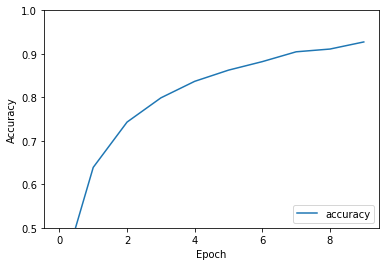

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
#plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test)

In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [12]:
model = load_model('vegetable.h5')

In [13]:
testimg = image.load_img("/Users/j.v.thomasabraham/Documents/Project Build-A-Thon SmartInternz/Dataset-Plant-Disease/veg-dataset/test/Pepper,_bell___healthy/b45d62a2-3de1-411b-8f88-ab52195b6dda___JR_HL 7639.jpg", target_size = (128, 128))

In [14]:
x=image.img_to_array(testimg)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)

2022-07-31 00:05:48.927089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 377ms/step


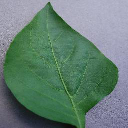

In [15]:
testimg

In [17]:
y

array([1])

In [18]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [19]:
index = ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 
         'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Late_blight',
         'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']

In [20]:
index[y[0]]

'Pepper,_bell___healthy'

In [21]:
testimg=image.load_img("/Users/j.v.thomasabraham/Documents/Project Build-A-Thon SmartInternz/Dataset-Plant-Disease/veg-dataset/test/Tomato___Bacterial_spot/b74c5fcf-390e-4fd1-abfc-a78f5c36c631___GCREC_Bact.Sp 3504.JPG", target_size = (128, 128))
x=image.img_to_array(testimg)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index[y[0]]

1/1 [==============================] - 0s 18ms/step


'Tomato___Septoria_leaf_spot'

# IBM Deployment

In [2]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 22.7 MB/s eta 0:00:01


In [3]:
from ibm_watson_machine_learning import APIClient
from ibm_watson_machine_learning import APIClient 
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"EwwoNzk_9zXHEqk58WaEPI9aLY-Y04uU0E4cLvxqU-us"
}
client=APIClient(wml_credentials)

In [4]:
client

In [7]:
def guid_space_name(client,plant_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==plant_deploy)['metadata']['id'])

In [8]:
space_uid=guid_space_name(client,'plant_deploy') 
print("Space UID "+space_uid)

Space UID e4ee9f70-2731-4abd-9447-ff76f7b28465


In [9]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list(200)